# PA 2: Classification - Nearest Neighbors



For this assignment use Jupyter notebook, Pandas, and scikit.

* Load dataset_NN.csv dataset.
* Data Pre-processing.
* Using Pearson's Correlation Coefficient find out the relation between varaibles using Heat Map(Draw heat maps before and after cleaning data to find differences)
* Scale the data and mention which scaling technique used
* Split your dataset 75% for training, and 25% for testing and do cross validation for the classifier.
* Find the best K using elbow method.
* Use Euclidean distance.
* Select three best attributes and explain why you chose them.
* Test the classifier with three different k values for neighbors and record the results.
* Plot the ROC curve for best K value.
* Use comments to explain your code at each step of all points.
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers. **Plot the Error rate vs. K-value**.


In [ ]:
#Importing Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
#Load the dataset into a dataframe
df_KNN = pd.read_csv('dataset_KNN.csv')
df_KNN.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Getting the statistical description of data
df_KNN.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#getting the count of null values for each column
df_KNN.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: title={'center': 'Heatmap Before Data Preprocessing'}>

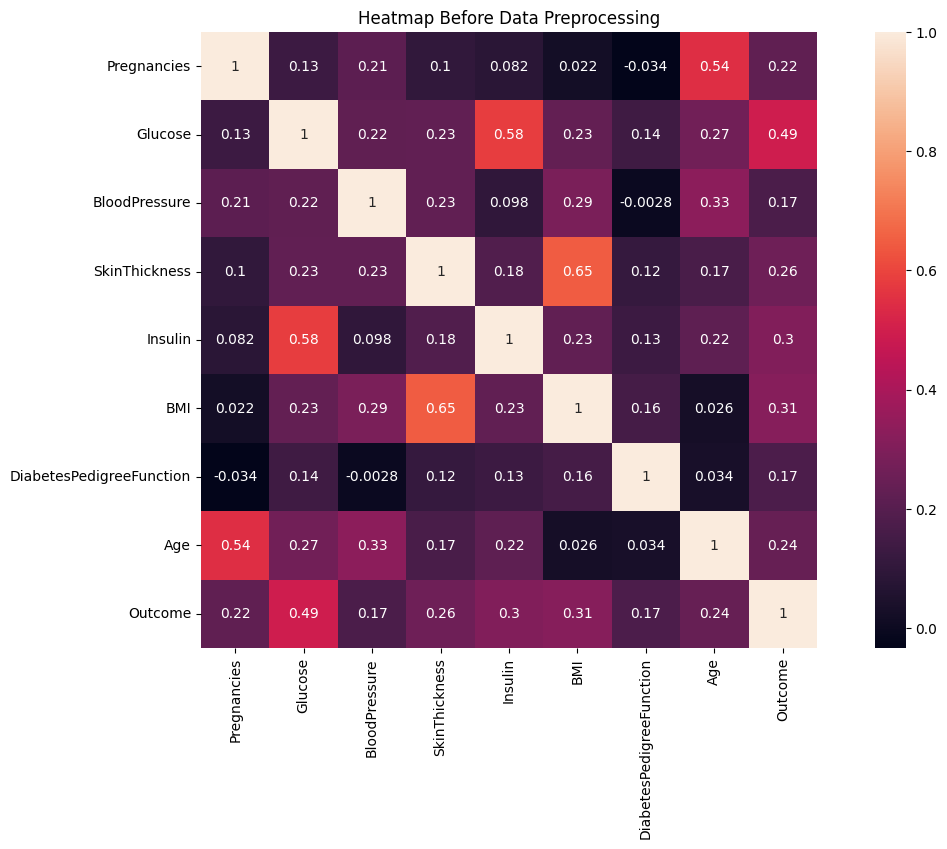

In [ ]:
# Ploting heatmap for original dataset
plt.figure(figsize = (15,8))
plt.title('Heatmap Before Data Preprocessing')
corelation=df_KNN.corr()
sns.heatmap(data=corelation,square=True,annot=True,cbar=True)

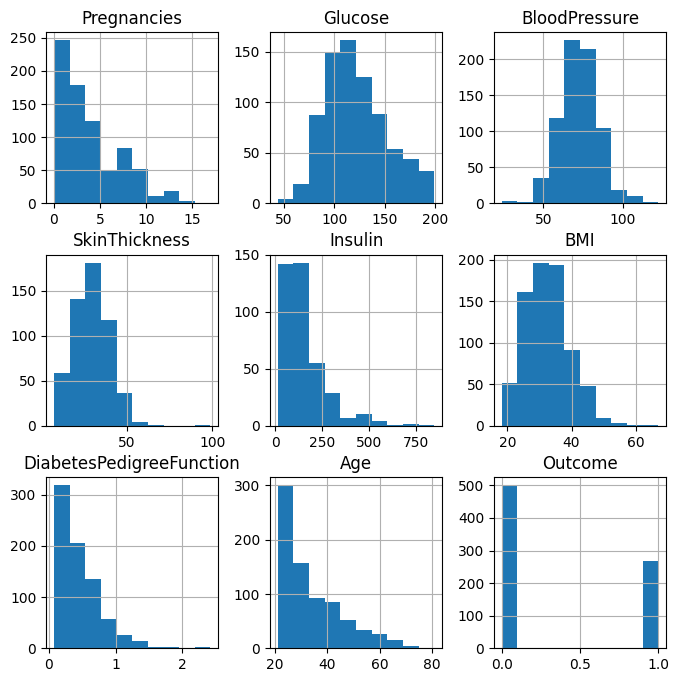

In [ ]:
# plotting histogram for single variable withoutcome variable
histogram = df_KNN.hist(figsize=(8,8))

According to 5% rule we can drop the rows having NaN values which are less than 5% so we are dropping rows in  Glucose, BloodPressure, BMI columns.

In [ ]:
# drop the rows with NaN
df_KNN = df_KNN.dropna(subset=['Glucose'])
df_KNN = df_KNN.dropna(subset=['BloodPressure'])
df_KNN = df_KNN.dropna(subset=['BMI'])

# reset the index of dataframe
df_KNN = df_KNN.reset_index(drop=True)

#printing the count of NaN value in each column
df_KNN.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df_KNN.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# replace the NaN values in SkinThickness and Insulin columns with mean of their values
df_KNN['SkinThickness'].fillna(df_KNN['SkinThickness'].mean(), inplace = True)
df_KNN['Insulin'].fillna(df_KNN['Insulin'].mean(), inplace = True)

In [ ]:
df_KNN.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.182331,156.056122,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.018907,87.395294,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,118.250000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.182331,156.056122,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,156.056122,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Here the maximum value for insulin is 846, it is not possible. So it is a outlier in dataset. We are going to use boxplot to find the outliers.

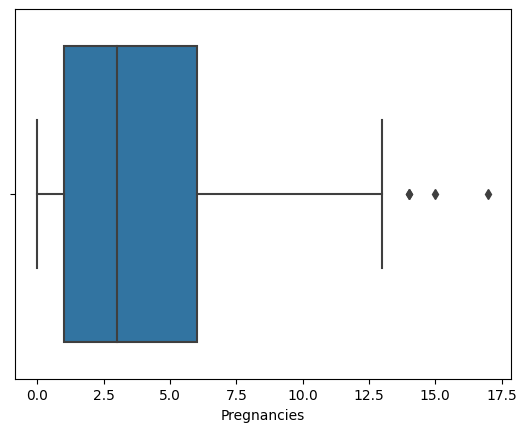

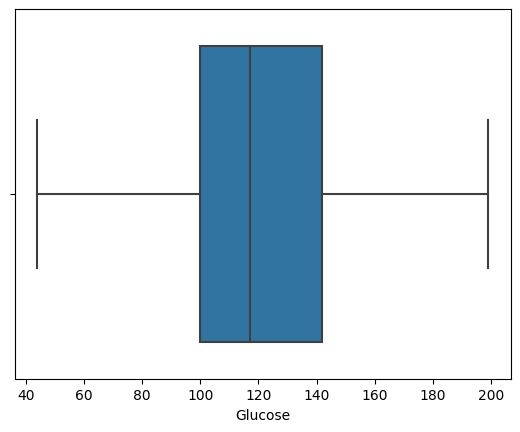

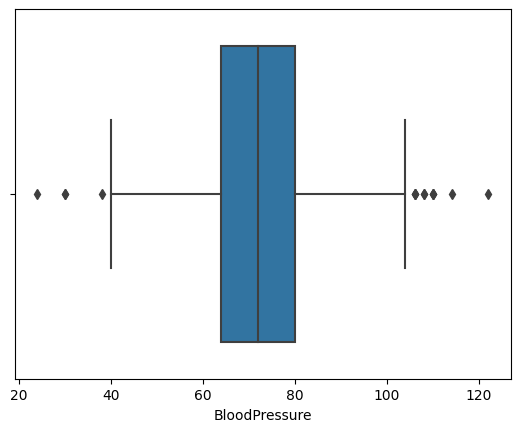

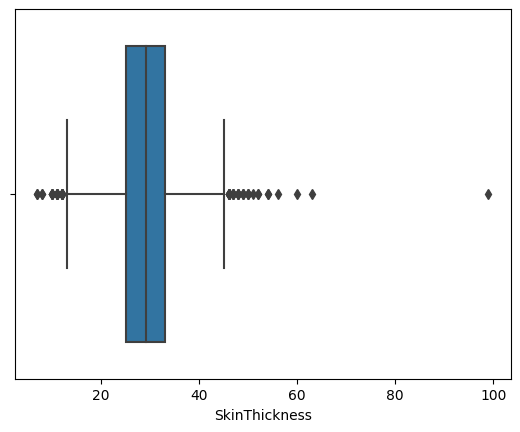

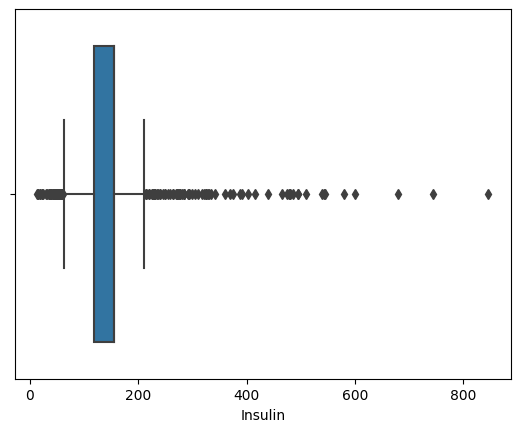

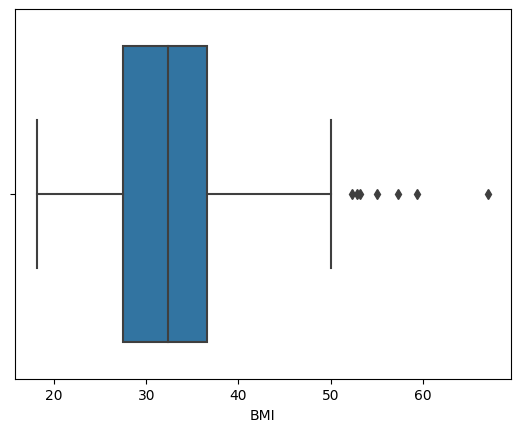

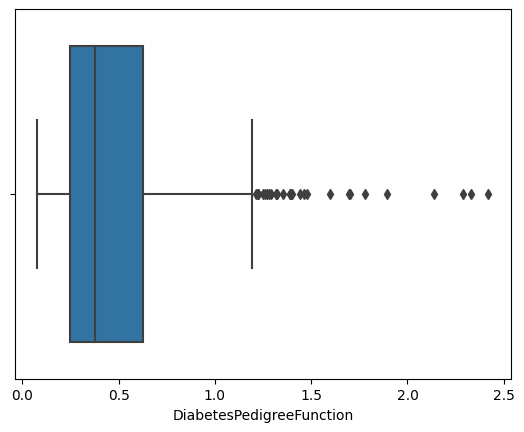

In [ ]:
# use box plot for features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

# ploting boxplot for each feature
for feature in features:
    sns.boxplot(x=feature, data=df_KNN)
    plt.show()

From above box plot we can see that there is outliers in <b>SkinThickness, Insulin, BMI, DiabetesPedigreeFunction</b> to remove outliers we use the following technics

To remove outliers we are doing to use <b>Z-score</b>. The <b>Z-Score</b> is a statistical measure that compares a data point with the average and standard deviation of a group of data points. It allows us to determine how far a data point is from the mean in terms of standard deviation units. By standardizing the data, the mean becomes 0 and the standard deviation becomes 1. To identify outliers, we use a threshold of 3 or -3, which means that any data point with a Z-Score greater than 3 or less than -3 is considered an outlier. To achieve this, we re-scale and center the data to locate data points that are significantly different from the mean.

In [ ]:
# Calculating zscore
z_score = np.abs(stats.zscore(df_KNN))
print(z_score)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.635022  0.849933       0.032378       0.645499  0.000000  0.164562   
1       0.852861  1.200262       0.517370       0.020230  0.000000  0.852262   
2       1.230175  1.988930       0.679035       0.000000  0.000000  1.331622   
3       0.852861  1.070091       0.517370       0.685959  0.710553  0.634371   
4       1.150438  0.491962       2.619006       0.645499  0.136759  1.544537   
..           ...       ...            ...            ...       ...       ...   
719     1.825328  0.679578       0.290951       2.087911  0.274162  0.062879   
720     0.555284  0.003821       0.194042       0.242140  0.000000  0.629395   
721     0.337445  0.028722       0.032378       0.685959  0.504450  0.910366   
722     0.852861  0.133992       1.002363       0.000000  0.000000  0.343850   
723     0.852861  0.939920       0.194042       0.201679  0.000000  0.300272   

     DiabetesPedigreeFunction       Age

In [ ]:
# Setting threshold to 3 and print the outlier values
threshold = 3
print(np.where(z_score > 3))

(array([  4,   7,  11,  15,  40,  42,  53,  54,  80,  98, 103, 112, 115,
       117, 117, 144, 150, 167, 167, 175, 208, 215, 215, 234, 270, 282,
       313, 347, 347, 371, 385, 391, 418, 418, 418, 427, 431, 456, 514,
       544, 549, 557, 561, 582, 605, 615, 626, 633, 650, 654, 709],
      dtype=int64), array([6, 4, 4, 2, 2, 6, 3, 6, 0, 2, 4, 5, 7, 2, 5, 4, 0, 2, 5, 4, 4, 4,
       6, 4, 4, 0, 6, 4, 6, 6, 4, 4, 3, 5, 6, 0, 7, 4, 2, 3, 4, 6, 2, 6,
       4, 4, 7, 5, 2, 4, 4], dtype=int64))


In [ ]:
# selecting all the values which are less than the threshold
df_KNN = df_KNN[(z_score < 3).all(axis=1)]

In [ ]:
df_KNN.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,156.056122,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,156.056122,26.6,0.351,31,0
2,8,183.0,64.0,29.182331,156.056122,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,29.182331,156.056122,25.6,0.201,30,0


In [ ]:
df_KNN.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,3.852725,120.185567,72.268041,28.745623,146.276900,32.098969,0.453476,33.094256,0.328424
std,3.262207,29.865841,11.580882,8.374117,59.333854,6.470702,0.284706,11.456469,0.469986
min,0.000000,44.000000,38.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,116.000000,27.350000,0.245000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,29.182331,156.056122,32.000000,0.368000,29.000000,0.000000
75%,6.000000,138.500000,80.000000,32.000000,156.056122,36.100000,0.603000,40.000000,1.000000
max,13.000000,199.000000,108.000000,54.000000,415.000000,52.900000,1.461000,68.000000,1.000000


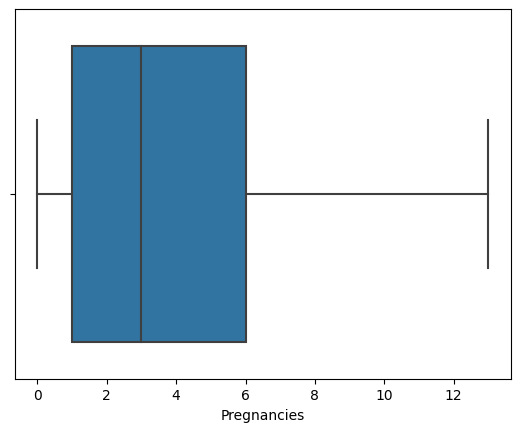

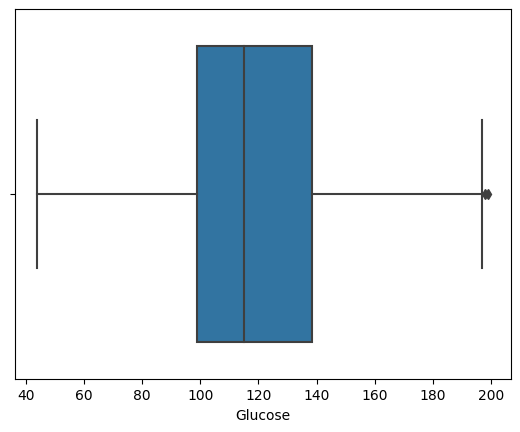

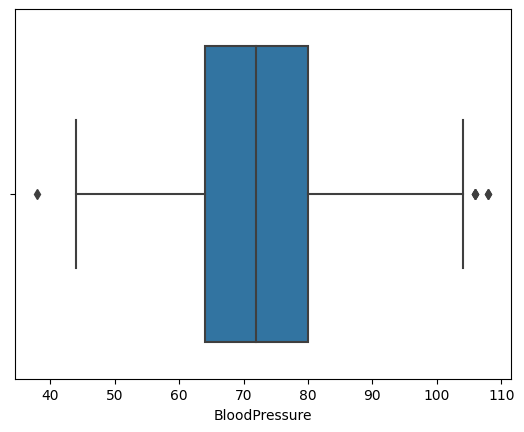

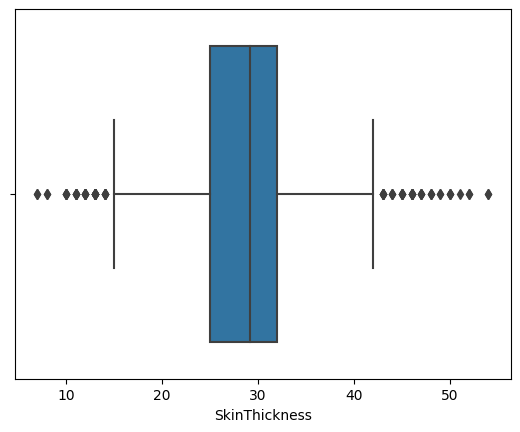

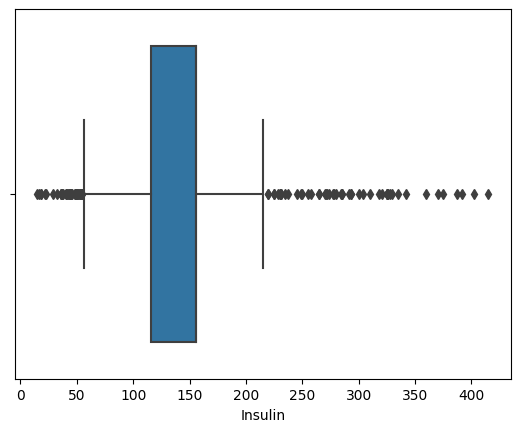

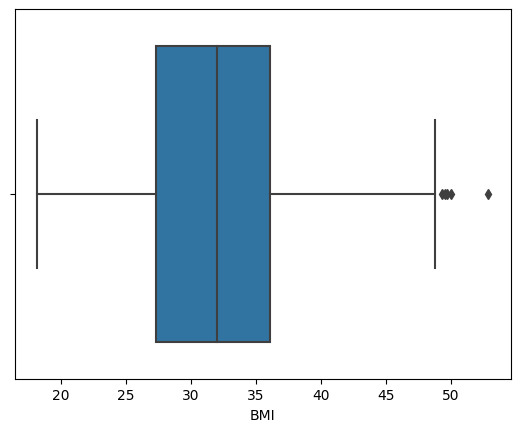

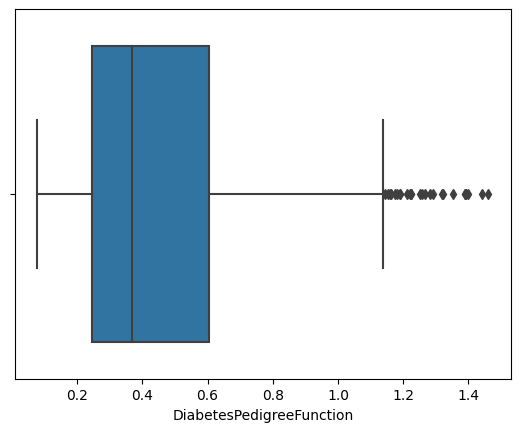

In [ ]:
# use box plot for features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

# ploting boxplot for each feature
for feature in features:
    sns.boxplot(x=feature, data=df_KNN)
    plt.show()

Still after using <b>Z-Score</b> there  are still outliers so we are going to use <b>IQR Score</b> to remove outliers.</br>
The IQR (Interquartile Range) is a statistical measure that represents the difference between the 75th and 25th percentiles, which are the upper and lower quartiles, respectively. Despite using the Z-score method to identify outliers, some outliers were still detected. To address this issue, I decided to utilize the IQR score method to remove them.

In [ ]:
# calculates the value of the first quartile
quartile1 = df_KNN.quantile(0.25)

# calculates the value of the third quartile
quartile3 = df_KNN.quantile(0.75)

# IQR is computed as the difference between the third and first quartiles
IQR = quartile3 - quartile1
print(IQR)

Pregnancies                  5.000000
Glucose                     39.500000
BloodPressure               16.000000
SkinThickness                7.000000
Insulin                     40.056122
BMI                          8.750000
DiabetesPedigreeFunction     0.358000
Age                         16.000000
Outcome                      1.000000
dtype: float64


In [ ]:
#remove outliers using IQR
df_KNN = df_KNN[~((df_KNN < (quartile1 - 1.6 * IQR)) |(df_KNN > (quartile3 + 1.6 * IQR))).any(axis=1)]
print(df_KNN.shape)
df_KNN.describe()

(513, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,3.951267,119.399610,72.091618,28.536766,141.653558,31.900000,0.415897,33.159844,0.319688
std,3.257138,28.231433,10.868954,6.241969,33.937818,6.100394,0.244616,10.965401,0.466811
min,0.000000,44.000000,44.000000,14.000000,52.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,26.000000,130.000000,27.400000,0.235000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,29.182331,156.056122,32.000000,0.341000,30.000000,0.000000
75%,6.000000,137.000000,80.000000,31.000000,156.056122,35.700000,0.564000,41.000000,1.000000
max,13.000000,196.000000,104.000000,43.000000,220.000000,49.600000,1.174000,65.000000,1.000000


Now there is no any outliers so we go with next step.

<Axes: title={'center': 'Heatmap After Data Preprocessing'}>

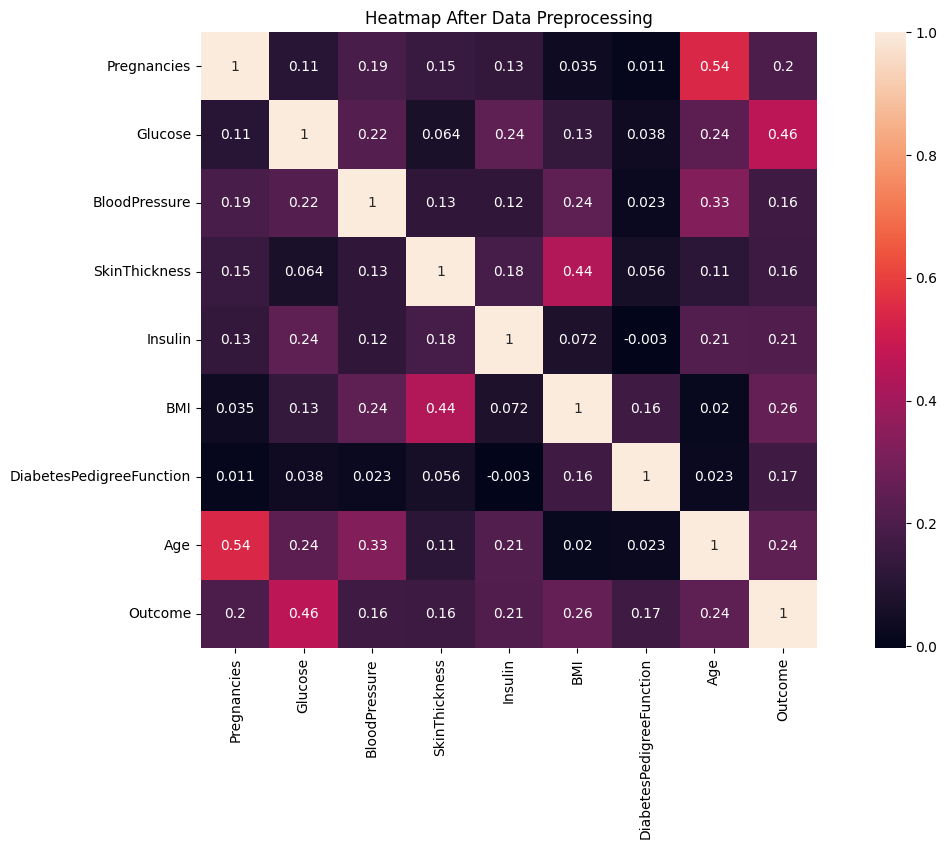

In [ ]:
# ploting heatmap after data preprocessing
plt.figure(figsize = (15,8))
plt.title('Heatmap After Data Preprocessing')
corr=df_KNN.corr()
sns.heatmap(data=corr,square=True,annot=True,cbar=True)


#### Correlation is a statistical measure that describes the strength and direction of the relationship between two variables. In the context of feature selection, attributes that have a high correlation with the target variable are likely to be good predictors of its value and should be prioritized.

Using Correlation we chose three attributes with highest Correlation with outcome attribute that are <b>Glucose(0.46), Age(0.24) and BMI(0.26)</b>

In [ ]:
# Select the best 3 attributes
X = df_KNN[['Glucose','Age','BMI']]
X.head()

,Glucose,Age,BMI
0,148.0,50,33.6
1,85.0,31,26.6
2,183.0,32,23.3
3,89.0,21,28.1
5,116.0,30,25.6


In [ ]:
# Store the outcome varibale
y = df_KNN['Outcome']

In [ ]:
# Train and split the data in 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)

In [ ]:
#Scale the data using standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#created a empty array
error_rate = []

# for we are trying the every value in the range of 1 to 30 for K
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i, p=2)     # set p =2 for using Euclidean Distance as parameter
    knn.fit(X_train,y_train)                           # fit the value with train dataset
    predict = knn.predict(X_test)                      # store the prediction with test dataset
    f1 = f1_score(predict,y_test)                      # check the f1 score for prediction and actual values
    z = 1-f1                                           # calculate the error
    error_rate.append(z)                               # append the error for that k value in error rate

Text(0, 0.5, 'Error Rate')

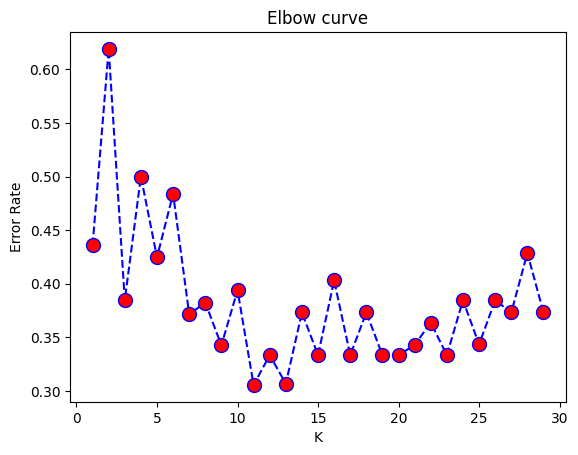

In [ ]:
# plot the elbow curve for k with respect to error rate
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Elbow curve')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1) # print the k value with minimum error
error_rate[error_rate.index(min(error_rate))] = 1                                     # set the minimum value to 1 which is max
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1) # print the k value with minimum error
error_rate[error_rate.index(min(error_rate))] = 1                                     # set the minimum value to 1 which is max
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1) # print the k value with minimum error
error_rate[error_rate.index(min(error_rate))] = 1                                     # set the minimum value to 1 which is max
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1) # print the k value with minimum error
error_rate[error_rate.index(min(error_rate))] = 1                                     # set the minimum value to 1 which is max
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1) # print the k value with minimum error
error_rate[error_rate.index(min(error_rate))] = 1                                     # set the minimum value to 1 which is max

Minimum error:- 0.30555555555555547 at K = 11
Minimum error:- 0.30666666666666675 at K = 13
Minimum error:- 0.33333333333333326 at K = 12
Minimum error:- 0.33333333333333326 at K = 20
Minimum error:- 0.33333333333333326 at K = 23


## k = 11, k = 13 and k = 12 are the best 3 values for k


In [ ]:
# K=13
#Setup a knn classifier with k neighbors = 13
knn13 = KNeighborsClassifier(n_neighbors=13, p=2)        # set p =2 for using Euclidean Distance as parameter

knn13.fit(X_train,y_train)                                # Train the model
knn13.score(X_test,y_test)                                # Check the score of the model

0.8217054263565892

In [ ]:
# K= 11
#Setup a knn classifier with k neighbors - 11
knn11 = KNeighborsClassifier(n_neighbors=11, p=2)        # set p =2 for using Euclidean Distance as parameter

knn11.fit(X_train,y_train)                                # Train the model
knn11.score(X_test,y_test)                                # Check the score of the model

0.8294573643410853

In [ ]:
# K=12
#Setup a knn classifier with k neighbors = 12
knn12 = KNeighborsClassifier(n_neighbors=12, p=2)        # set p =2 for using Euclidean Distance as parameter

knn12.fit(X_train,y_train)                                # Train the model
knn12.score(X_test,y_test)                                # Check the score of the model

0.8217054263565892

In [ ]:
# To predicts the probabilities of the positive class for each instance in the test dataset
y_pred_proba = knn11.predict_proba(X_test)[:,1]

# To computes the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

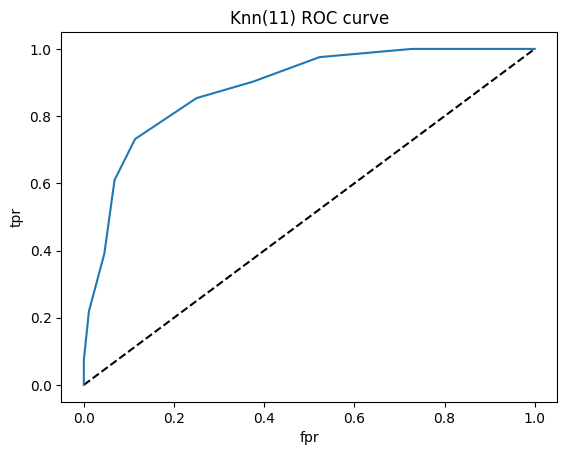

In [ ]:
# Plot the ROC curve

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(11) ROC curve')
plt.show()

In [ ]:
err= []

[[80  8]
 [15 26]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        88
           1       0.76      0.63      0.69        41

    accuracy                           0.82       129
   macro avg       0.80      0.77      0.78       129
weighted avg       0.82      0.82      0.82       129



Text(0.5, 23.52222222222222, 'Predicted label')

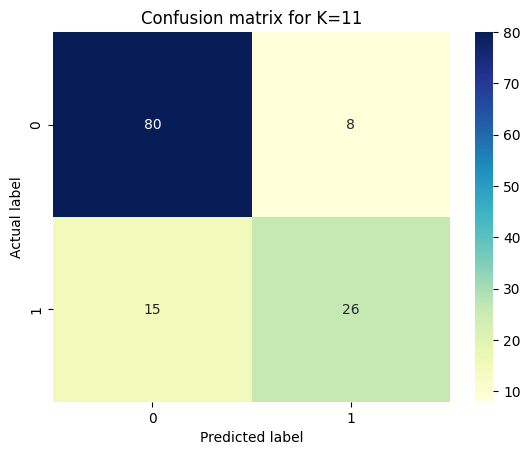

In [ ]:
# ceate a knn model with k= 11
knn11 = KNeighborsClassifier(n_neighbors=11, p=2)
knn11.fit(X_train,y_train)
pred = knn13.predict(X_test)

err.append(1-f1_score(pred,y_test))

# print the confusion matrix
print(confusion_matrix(y_test,pred))

# print the classification report
print(classification_report(y_test,pred))

# plot the heatmap for confusion matrix
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,pred)), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix for K=11')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

[[82  6]
 [16 25]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        88
           1       0.81      0.61      0.69        41

    accuracy                           0.83       129
   macro avg       0.82      0.77      0.79       129
weighted avg       0.83      0.83      0.82       129



Text(0.5, 23.52222222222222, 'Predicted label')

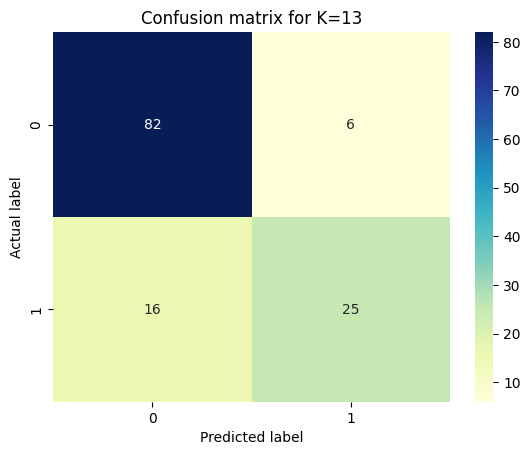

In [ ]:
# ceate a knn model with k= 13
knn13 = KNeighborsClassifier(n_neighbors=13, p=2)
knn13.fit(X_train,y_train)
pred = knn11.predict(X_test)

err.append(1-f1_score(pred,y_test))

# print the confusion matrix
print(confusion_matrix(y_test,pred))

# print the classification report
print(classification_report(y_test,pred))

# plot the heatmap for confusion matrix
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,pred)), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix for K=13')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

[[83  5]
 [18 23]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        88
           1       0.82      0.56      0.67        41

    accuracy                           0.82       129
   macro avg       0.82      0.75      0.77       129
weighted avg       0.82      0.82      0.81       129



Text(0.5, 23.52222222222222, 'Predicted label')

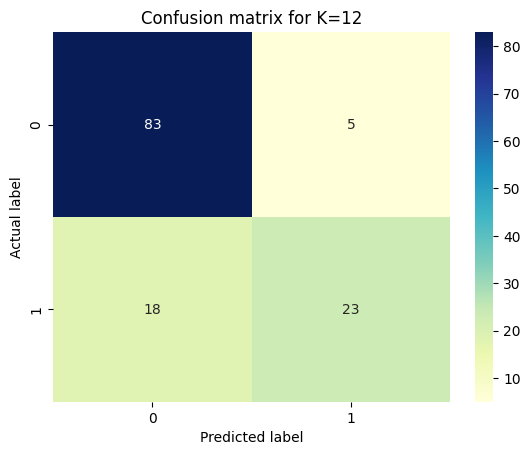

In [ ]:
# ceate a knn model with k= 12
knn12 = KNeighborsClassifier(n_neighbors=12, p=2)
knn12.fit(X_train,y_train)
pred = knn12.predict(X_test)

err.append(1-f1_score(pred,y_test))

# print the confusion matrix
print(confusion_matrix(y_test,pred))

# print the classification report
print(classification_report(y_test,pred))

# plot the heatmap for confusion matrix
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,pred)), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix for K=12')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0, 0.5, 'K')

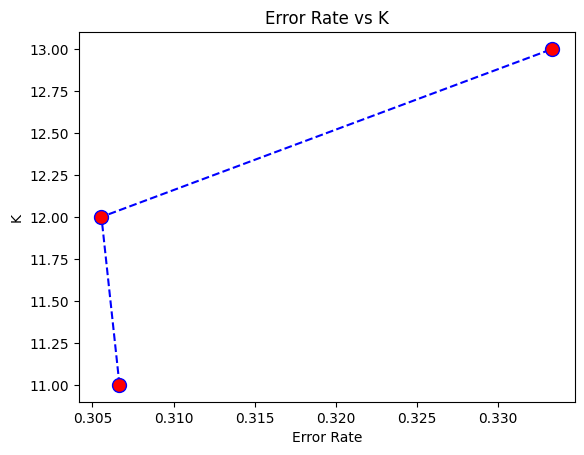

In [ ]:
k = [11,12,13]

# plot the error rate vs k value graph
plt.plot(err,k,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('Error Rate')
plt.ylabel('K')

# Report

## Q1 Describe the Nearest Neighbors method and why scaling is important in KNN. [5 points]</br>
The Nearest Neighbors (KNN) method is a classification and regression algorithm that predicts the label or value of a new data point based on the most similar data points in its neighborhood. The algorithm selects a fixed number (K) of the nearest neighbors to the new data point and calculates their average value or the majority class label to make a prediction.</br>
Scaling is important in KNN because it uses a distance metric to identify the nearest neighbors, and unscaled features can dominate the distance calculation, leading to biased results. Scaling ensures that each feature contributes equally to the distance metric and improves the performance of the algorithm.

## Q2 Explain what your criteria was for selecting the three attributes. What other 3 attribute can you choose? Visualizations of the target variable w.r.t three most significant attributes in a 2D projection, and write your observations in 4 - 5 lines [5 points]
</br>
We can see the predictor variables are not highly correlated to each other (corr>0.7) So we don't have any issue of multicollinearity. We can see the three most correlated predictors with respect to the outcome variable (class) are:
<b>Glucose(0.46), Age(0.24) and BMI(0.26)</b>
</br></br>
The other attributes we can select are BloodPressure, SkinThickness, Insulin. </br>


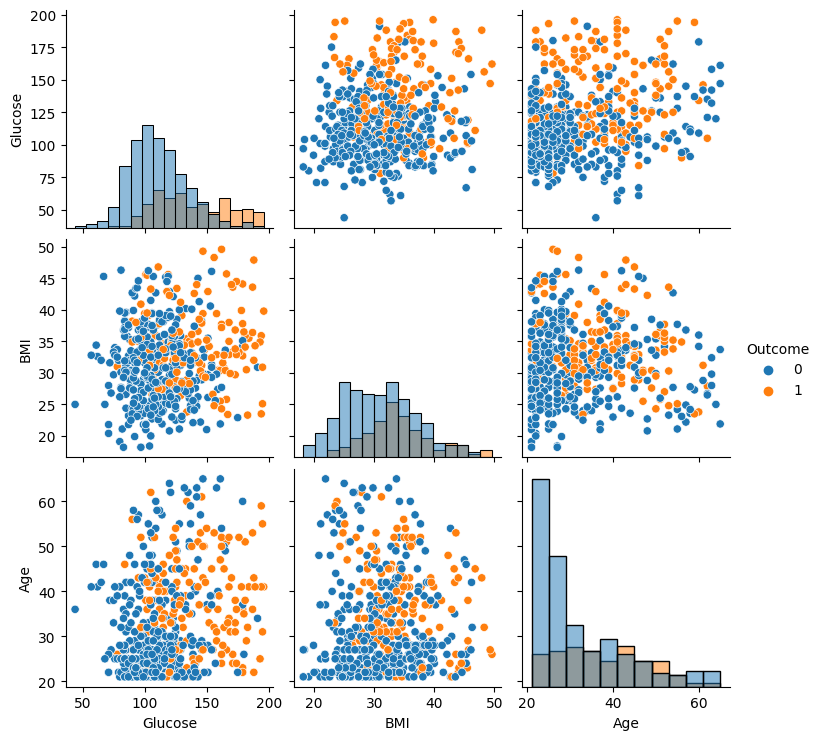

In [ ]:
sns.pairplot(df_KNN[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome', diag_kind='hist')

In above pair plot we can identify that :</br>
1. Glucose vs. Outcome: There is a clear separation between the two classes of the target variable. Patients with higher glucose levels tend to have a higher risk of diabetes.

2. BMI vs. Outcome: The scatter plot shows some overlap between the two classes, but patients with higher BMI values tend to have a higher risk of diabetes.

3. Age vs. Outcome: The scatter plot shows some overlap between the two classes, but older patients tend to have a higher risk of diabetes.


## Q3 Explain Pearson's Correlation Coefficient, write the observations from heatmaps drawn. [5 points] </br>
Pearson's Correlation Coefficient is a measure of the linear relationship between two variables. It measures the degree to which two variables are related and can range from -1 (perfect negative correlation) to +1 (perfect positive correlation). A value of 0 indicates no correlation.</br>
From the heatmap, we can make the following observations:</br>

1. Glucose level is positively correlated with Outcome, indicating that higher glucose levels are associated with a higher risk of diabetes.

2. Age is moderately positively correlated with Outcome, indicating that older patients may be slightly more likely to have diabetes.

3. BloodPressure and SkinThickness are weakly positively correlated with each other, which is not surprising since blood pressure is often associated with body weight and overall health.

4. SkinThickness and BMI are positively correlated we with eeach other, indicating that SkinThickness is associated with BMI

5. Age and Pregnancies are strongly correlated we with eeach other, indicating that the no. of Pregnancies are dependent on the Age



## Interpret and compare the results. [5 points] </br>
We performed knn using k = 13, k = 11, k = 12.</br>
With this 3 values attribute we get least error. </br>
With k = 13 we get accuracy of 82.17%, with k = 11 we get accuracy of 82.94%.</br>
With k = 13, 82 are correctly mark as 0 and 16 incorrectly mark as 1. 25 are correctly mark as 1 and 6 are incorrectly mark as 0.

## Referrence
1. https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
2. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
3. https://seaborn.pydata.org/generated/seaborn.heatmap.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
5. https://sparkbyexamples.com/pandas/pandas-create-new-dataframe-by-selecting-specific-columns/#:~:text=You%20can%20create%20a%20new,added%20to%20the%20original%20ones
6. https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7
7. https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
8. https://medium.com/@sudhanshugupta_66164/k-nearest-neighbor-knn-algorithm-for-machine-learning-1b506eb2c4a4
9. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
10. https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20is%20a,performance%20of%20a%20classification%20algorithm
11. http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
12. http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
13. https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832